## Initial sampling for 200 subjects yielded 186 scans because 14 images failed the QA pipeline. Sampling more subjects to obtain a 100 subjects to ensure a good amount of data

In [7]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import shutil 
from tqdm import tqdm
import nibabel as nib 

In [8]:
#Load the converted data 
ge_copd = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/dcm2nii/scan.csv")
ge_copd.sort_values(by = ['PatientID'], inplace = True)
ge_copd.reset_index(drop = True, inplace = True)
ge_copd

,PatientID,StudyDate,Modality,BodyPart,Manufacturer,Spacing,NumSlice,NumDICOM,ScanLength,SeriesUID,ConvolutionKernel,SliceThickness,KVP,Reconstruction Diameter,Exposure Time,X-Ray Tube Current,Exposure,Spiral Pitch Factor
0,COPDGene_A16009,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,522,522,326.250,1.2.840.113619.2.55.3.3852317604.741.128769737...,BONE,0.625,120.0,322.0,500,400,4,1.375
1,COPDGene_A16009,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,507,507,316.875,1.2.840.113619.2.55.3.3852317604.741.128769737...,STANDARD,0.625,120.0,322.0,500,100,1,1.375
2,COPDGene_A24802,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,584,584,365.000,1.2.840.113619.2.55.3.2831167752.727.122840803...,BONE,0.625,120.0,360.0,500,400,2,1.375
3,COPDGene_A24802,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,489,489,305.625,1.2.840.113619.2.55.3.2831167752.727.122840803...,STANDARD,0.625,120.0,360.0,500,100,0,1.375
4,COPDGene_A27373,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,521,521,325.625,1.2.840.113619.2.25.4.476785.1234986127.214,BONE,0.625,120.0,320.0,478,400,9,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,COPDGene_Q42739,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,490,490,306.250,1.2.840.113619.2.108.3994720393.25664.12807305...,BONE,0.625,120.0,360.0,478,400,9,1.375
182,COPDGene_Q53485,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,465,465,290.625,1.2.840.113619.2.55.3.2831167752.160.127557716...,BONE,0.625,120.0,380.0,500,400,2,1.375
183,COPDGene_Q53485,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,393,393,245.625,1.2.840.113619.2.55.3.2831167752.160.127557716...,STANDARD,0.625,120.0,380.0,500,100,0,1.375
184,COPDGene_Q53566,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,492,492,307.500,1.2.840.113619.2.108.1627440376.19952.12410426...,BONE,0.625,120.0,360.0,505,400,9,1.375


In [9]:
#Group the kernels by patient ID to see if pairs are present
ge_copd_grouped = ge_copd.groupby(['PatientID', 'ConvolutionKernel']).size().reset_index(name = 'Counts')
ge_copd_grouped

,PatientID,ConvolutionKernel,Counts
0,COPDGene_A16009,BONE,1
1,COPDGene_A16009,STANDARD,1
2,COPDGene_A24802,BONE,1
3,COPDGene_A24802,STANDARD,1
4,COPDGene_A27373,BONE,1
...,...,...,...
181,COPDGene_Q42739,BONE,1
182,COPDGene_Q53485,BONE,1
183,COPDGene_Q53485,STANDARD,1
184,COPDGene_Q53566,BONE,1


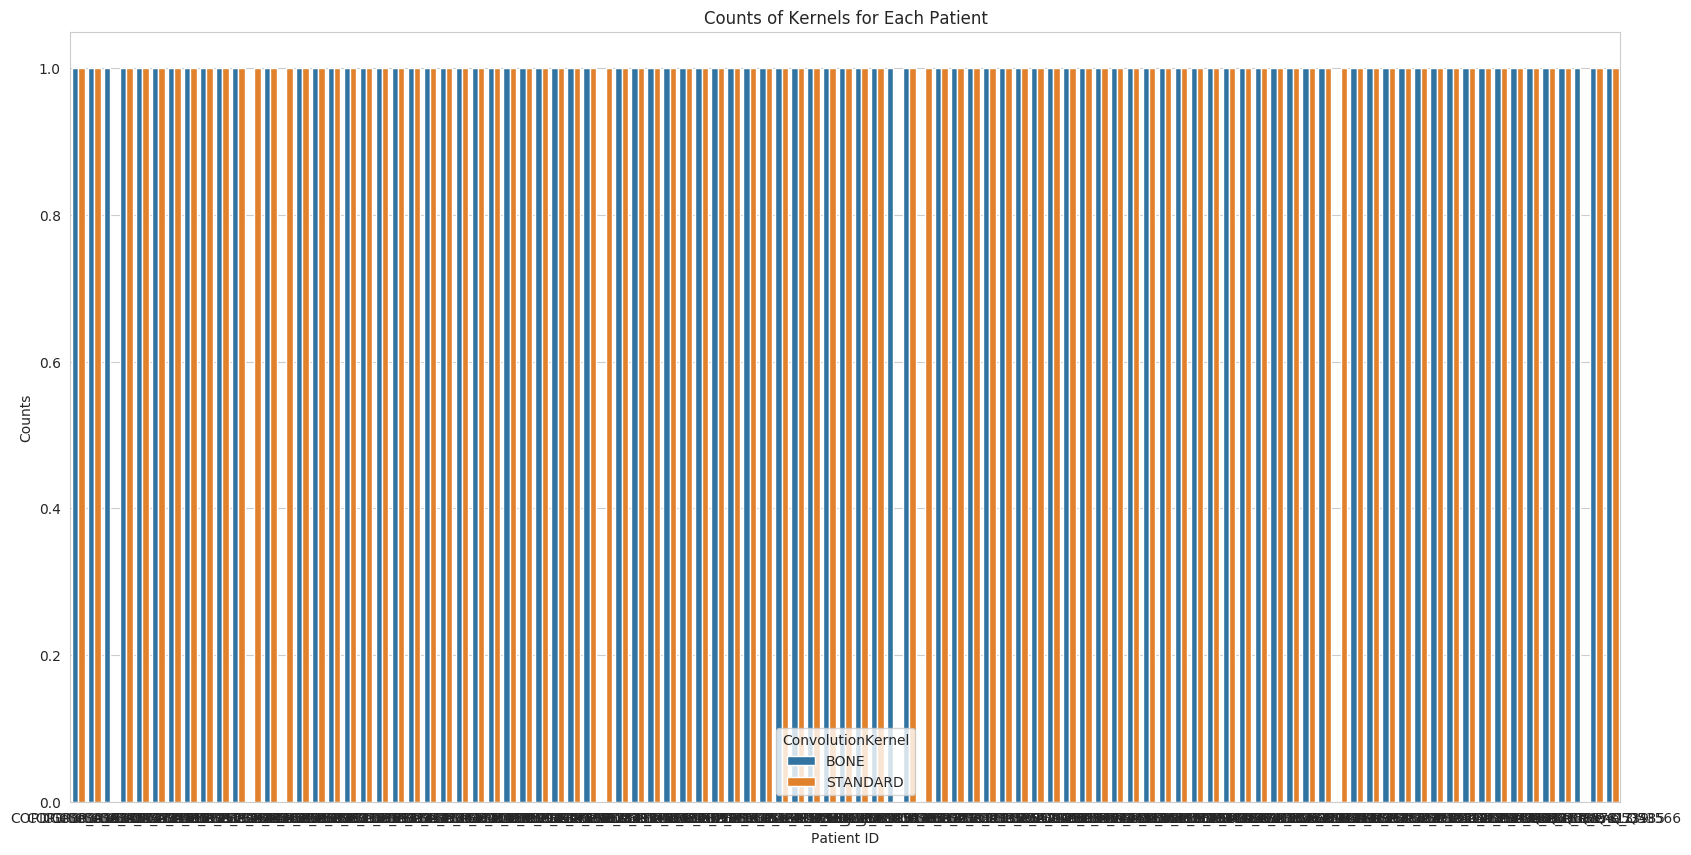

In [10]:
#Plot the counts of kernels for each patient
sns.set_style("whitegrid")
plt.figure(figsize = (20, 10))
sns.countplot(data = ge_copd_grouped, x = 'PatientID', hue = 'ConvolutionKernel')
plt.title("Counts of Kernels for Each Patient")
plt.xlabel("Patient ID")
plt.ylabel("Counts")
plt.show()

In [11]:
#For a given patient ID, there should be a BONE and STANDARD kernel. Count the kernels for each patient
ge_copd

,PatientID,StudyDate,Modality,BodyPart,Manufacturer,Spacing,NumSlice,NumDICOM,ScanLength,SeriesUID,ConvolutionKernel,SliceThickness,KVP,Reconstruction Diameter,Exposure Time,X-Ray Tube Current,Exposure,Spiral Pitch Factor
0,COPDGene_A16009,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,522,522,326.250,1.2.840.113619.2.55.3.3852317604.741.128769737...,BONE,0.625,120.0,322.0,500,400,4,1.375
1,COPDGene_A16009,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,507,507,316.875,1.2.840.113619.2.55.3.3852317604.741.128769737...,STANDARD,0.625,120.0,322.0,500,100,1,1.375
2,COPDGene_A24802,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,584,584,365.000,1.2.840.113619.2.55.3.2831167752.727.122840803...,BONE,0.625,120.0,360.0,500,400,2,1.375
3,COPDGene_A24802,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,489,489,305.625,1.2.840.113619.2.55.3.2831167752.727.122840803...,STANDARD,0.625,120.0,360.0,500,100,0,1.375
4,COPDGene_A27373,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,521,521,325.625,1.2.840.113619.2.25.4.476785.1234986127.214,BONE,0.625,120.0,320.0,478,400,9,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,COPDGene_Q42739,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,490,490,306.250,1.2.840.113619.2.108.3994720393.25664.12807305...,BONE,0.625,120.0,360.0,478,400,9,1.375
182,COPDGene_Q53485,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,465,465,290.625,1.2.840.113619.2.55.3.2831167752.160.127557716...,BONE,0.625,120.0,380.0,500,400,2,1.375
183,COPDGene_Q53485,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,393,393,245.625,1.2.840.113619.2.55.3.2831167752.160.127557716...,STANDARD,0.625,120.0,380.0,500,100,0,1.375
184,COPDGene_Q53566,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,492,492,307.500,1.2.840.113619.2.108.1627440376.19952.12410426...,BONE,0.625,120.0,360.0,505,400,9,1.375


In [12]:
#For each patient, there should be a BONE and STANDARD kernel. Count 2 kernels for each patient
ge_copd_grouped = ge_copd.groupby(['PatientID']).size().reset_index(name = 'Counts')
ge_copd_grouped

,PatientID,Counts
0,COPDGene_A16009,2
1,COPDGene_A24802,2
2,COPDGene_A27373,1
3,COPDGene_A43240,2
4,COPDGene_A85812,2
...,...,...
92,COPDGene_Q08973,2
93,COPDGene_Q15613,2
94,COPDGene_Q42739,1
95,COPDGene_Q53485,2


In [13]:
single = ge_copd_grouped[ge_copd_grouped['Counts'] != 2]
double = ge_copd_grouped[ge_copd_grouped['Counts'] == 2]

In [14]:
singlekernel = single['PatientID'].to_list()
doublekernel = double['PatientID'].to_list()
singlekernel, doublekernel

(['COPDGene_A27373',
  'COPDGene_B54224',
  'COPDGene_B60928',
  'COPDGene_G20975',
  'COPDGene_K38317',
  'COPDGene_L04305',
  'COPDGene_N92368',
  'COPDGene_Q42739'],
 ['COPDGene_A16009',
  'COPDGene_A24802',
  'COPDGene_A43240',
  'COPDGene_A85812',
  'COPDGene_A90522',
  'COPDGene_B01752',
  'COPDGene_B05639',
  'COPDGene_B11434',
  'COPDGene_B14644',
  'COPDGene_B28306',
  'COPDGene_B58963',
  'COPDGene_B68201',
  'COPDGene_B86334',
  'COPDGene_C03575',
  'COPDGene_C16695',
  'COPDGene_C19374',
  'COPDGene_C33239',
  'COPDGene_C34471',
  'COPDGene_C75346',
  'COPDGene_D00372',
  'COPDGene_D36309',
  'COPDGene_D46984',
  'COPDGene_D48362',
  'COPDGene_D70993',
  'COPDGene_D90444',
  'COPDGene_E06175',
  'COPDGene_E80139',
  'COPDGene_F02607',
  'COPDGene_F90284',
  'COPDGene_G18413',
  'COPDGene_G34805',
  'COPDGene_G40486',
  'COPDGene_G42482',
  'COPDGene_G65620',
  'COPDGene_H05885',
  'COPDGene_H17650',
  'COPDGene_H18165',
  'COPDGene_H20439',
  'COPDGene_H22435',
  'COPDGene_

In [15]:
#Find subjects with only one kernels using singlekernel and remove them from the dataframe
ge_copd = ge_copd[~ge_copd['PatientID'].isin(singlekernel)]
ge_copd.reset_index(drop = True, inplace = True)
ge_copd

,PatientID,StudyDate,Modality,BodyPart,Manufacturer,Spacing,NumSlice,NumDICOM,ScanLength,SeriesUID,ConvolutionKernel,SliceThickness,KVP,Reconstruction Diameter,Exposure Time,X-Ray Tube Current,Exposure,Spiral Pitch Factor
0,COPDGene_A16009,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,522,522,326.250,1.2.840.113619.2.55.3.3852317604.741.128769737...,BONE,0.625,120.0,322.0,500,400,4,1.375
1,COPDGene_A16009,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,507,507,316.875,1.2.840.113619.2.55.3.3852317604.741.128769737...,STANDARD,0.625,120.0,322.0,500,100,1,1.375
2,COPDGene_A24802,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,584,584,365.000,1.2.840.113619.2.55.3.2831167752.727.122840803...,BONE,0.625,120.0,360.0,500,400,2,1.375
3,COPDGene_A24802,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,489,489,305.625,1.2.840.113619.2.55.3.2831167752.727.122840803...,STANDARD,0.625,120.0,360.0,500,100,0,1.375
4,COPDGene_A43240,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,469,469,293.125,1.2.840.113619.2.55.3.3852317604.390.127197598...,STANDARD,0.625,120.0,353.0,500,100,1,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,COPDGene_Q15613,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,560,560,350.000,1.2.840.113619.2.25.4.1253695.1214928689.249,STANDARD,1.250,120.0,346.0,526,100,4,1.375
174,COPDGene_Q53485,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,465,465,290.625,1.2.840.113619.2.55.3.2831167752.160.127557716...,BONE,0.625,120.0,380.0,500,400,2,1.375
175,COPDGene_Q53485,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,393,393,245.625,1.2.840.113619.2.55.3.2831167752.160.127557716...,STANDARD,0.625,120.0,380.0,500,100,0,1.375
176,COPDGene_Q53566,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,492,492,307.500,1.2.840.113619.2.108.1627440376.19952.12410426...,BONE,0.625,120.0,360.0,505,400,9,1.375


In [16]:
#Save the dataframe to pull the pairs for creating data 
ge_copd.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/final_paired_data_spreadsheets/COPD_GE_pairedkernels_initial_sampling.csv", index = False)

In [17]:
#Have 89 subjects with 2 kernels. Need 11 more as 11 failed the QA and yielded a single kernel. Sample 25 subjects with 2 kernels 
#Use the GE kernels csv file to filter out subjects already sampled to get new subjects for the purpose of getting 100 subjects 
copd_insp_exp = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/copdgene_goldcriteria_SPIE_data_GEkernels_paired_inspexpscans_ONLY.csv")
copd_insp_exp['PatientID_Inspiration_Expiration'] = copd_insp_exp['PatientID'] + '_' + copd_insp_exp['ConvolutionKernel']
copd_insp_exp

,File_Path,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer,Inspiration_Expiration,PatientID_Inspiration_Expiration
0,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,BONE,COPDGene_A00282_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_A00282_BONE
1,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,STANDARD,COPDGene_A00282_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_A00282_STANDARD
2,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A05113,BONE,COPDGene_A05113_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_A05113_BONE
3,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A05113,STANDARD,COPDGene_A05113_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_A05113_STANDARD
4,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A08860,BONE,COPDGene_A08860_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_A08860_BONE
...,...,...,...,...,...,...,...
1505,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q70095,BONE,COPDGene_Q70095_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_Q70095_BONE
1506,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q72811,STANDARD,COPDGene_Q72811_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_Q72811_STANDARD
1507,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q72811,BONE,COPDGene_Q72811_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_Q72811_BONE
1508,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q73716,BONE,COPDGene_Q73716_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_Q73716_BONE


In [18]:
unique_patients = copd_insp_exp['PatientID'].unique()

# Randomly sample 150 patients
sampled_patients = pd.Series(unique_patients).sample(150, random_state=1)

# Filter the DataFrame to only include the sampled patients
sampled_df = copd_insp_exp[copd_insp_exp['PatientID'].isin(sampled_patients)]
sampled_df

,File_Path,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer,Inspiration_Expiration,PatientID_Inspiration_Expiration
0,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,BONE,COPDGene_A00282_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_A00282_BONE
1,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,STANDARD,COPDGene_A00282_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_A00282_STANDARD
6,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A09543,STANDARD,COPDGene_A09543_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_A09543_STANDARD
7,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A09543,BONE,COPDGene_A09543_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_A09543_BONE
16,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A16009,BONE,COPDGene_A16009_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_A16009_BONE
...,...,...,...,...,...,...,...
1489,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q53566,STANDARD,COPDGene_Q53566_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_Q53566_STANDARD
1490,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q59293,BONE,COPDGene_Q59293_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_Q59293_BONE
1491,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q59293,STANDARD,COPDGene_Q59293_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_Q59293_STANDARD
1504,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q70095,STANDARD,COPDGene_Q70095_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_Q70095_STANDARD


In [19]:
#Remove the single and double kernels that were sampled in the first round from the newly sampled dataframe
sampled_df = sampled_df[~sampled_df['PatientID'].isin(singlekernel)]
sampled_df = sampled_df[~sampled_df['PatientID'].isin(doublekernel)]
sampled_df.reset_index(drop = True, inplace = True)
sampled_df

,File_Path,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer,Inspiration_Expiration,PatientID_Inspiration_Expiration
0,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,BONE,COPDGene_A00282_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_A00282_BONE
1,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A00282,STANDARD,COPDGene_A00282_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_A00282_STANDARD
2,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A09543,STANDARD,COPDGene_A09543_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_A09543_STANDARD
3,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A09543,BONE,COPDGene_A09543_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_A09543_BONE
4,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_A67397,BONE,COPDGene_A67397_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_A67397_BONE
...,...,...,...,...,...,...,...
101,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_P19505,STANDARD,COPDGene_P19505_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_P19505_STANDARD
102,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q59293,BONE,COPDGene_Q59293_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,COPDGene_Q59293_BONE
103,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q59293,STANDARD,COPDGene_Q59293_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_Q59293_STANDARD
104,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_Q70095,STANDARD,COPDGene_Q70095_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,COPDGene_Q70095_STANDARD


In [20]:
#count the number of patients with 2 kernels
sampled_df_grouped_newsample = sampled_df.groupby(['PatientID']).size().reset_index(name = 'Counts')
sampled_df_grouped_newsample

,PatientID,Counts
0,COPDGene_A00282,2
1,COPDGene_A09543,2
2,COPDGene_A67397,2
3,COPDGene_A77643,2
4,COPDGene_B02099,2
5,COPDGene_B25378,2
6,COPDGene_B26679,2
7,COPDGene_B39349,2
8,COPDGene_B87500,2
9,COPDGene_B98705,2


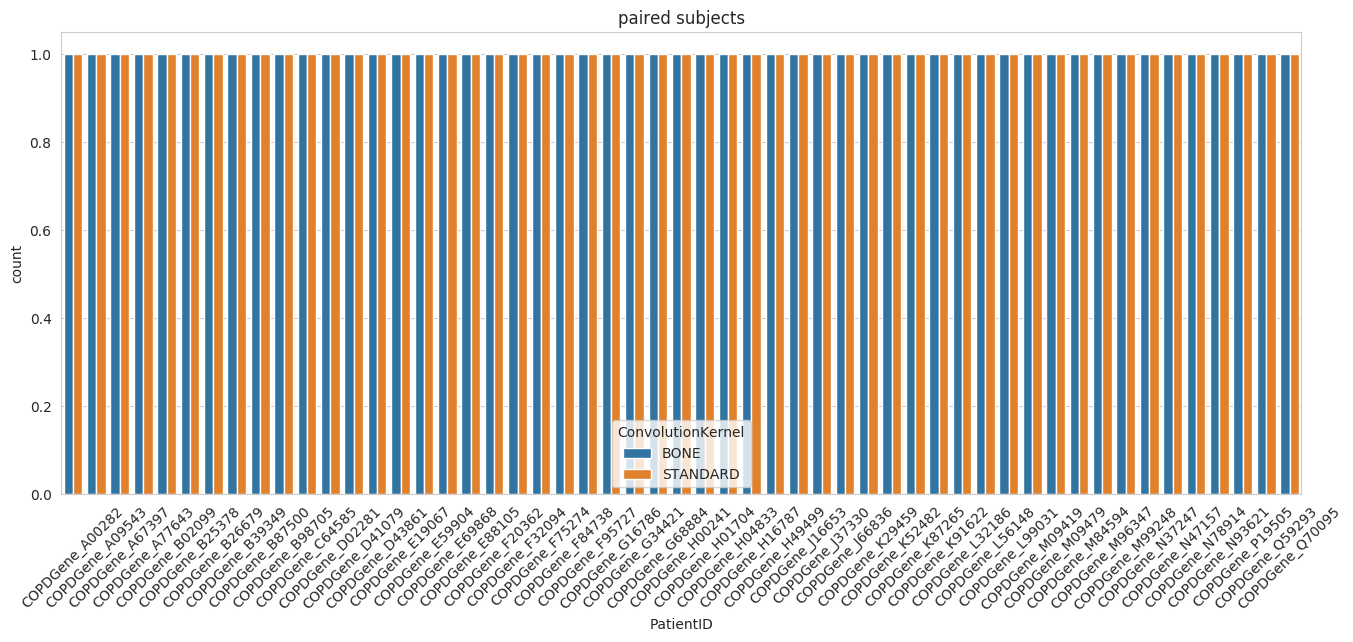

In [21]:
plt.figure(figsize=(16,6))
sns.countplot(x='PatientID', data=sampled_df, hue='ConvolutionKernel')
plt.title('paired subjects')
plt.xticks(rotation=45)
plt.show()

In [27]:
os.makedirs("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/raw_dcm_data_additional_sample", exist_ok=True)
for index, row in sampled_df.iterrows():
    patient_id_inspiration_expiration = row['PatientID_Inspiration_Expiration']
    src = row['File_Path']
    dest = f"/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/raw_dcm_data_additional_sample/{patient_id_inspiration_expiration}"
    
    os.symlink(src, dest)

### Getting an additional 14 subjects from 7 scans to obtain a 100 COPD scans to complete the dataset

In [6]:
copd_additional = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/dcm2nii_additional_sample/scan.csv")
copd_additional.sort_values(by = ['PatientID'], inplace = True)
copd_additional.reset_index(drop = True, inplace = True)
copd_additional

,PatientID,StudyDate,Modality,BodyPart,Manufacturer,Spacing,NumSlice,NumDICOM,ScanLength,SeriesUID,ConvolutionKernel,SliceThickness,KVP,Reconstruction Diameter,Exposure Time,X-Ray Tube Current,Exposure,Spiral Pitch Factor
0,COPDGene_A00282,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,473.0,473.0,295.625,1.2.840.113619.2.25.4.1253695.1231966686.250,STANDARD,0.625,120.0,320.0,478,100,2,1.375
1,COPDGene_A00282,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,482.0,482.0,301.250,1.2.840.113619.2.25.4.1253695.1231966598.13,BONE,0.625,120.0,320.0,478,400,9,1.375
2,COPDGene_A09543,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,475.0,475.0,296.875,1.2.840.113619.2.55.3.2474697517.628.126026976...,BONE,0.625,120.0,351.0,500,400,2,1.375
3,COPDGene_A09543,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,402.0,402.0,251.250,1.2.840.113619.2.55.3.2474697517.628.126026976...,STANDARD,0.625,120.0,340.0,500,100,0,1.375
4,COPDGene_A67397,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,571.0,571.0,356.875,1.2.840.113619.2.55.3.279720240.88.1254409501....,STANDARD,0.625,120.0,320.0,500,100,1,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,COPDGene_P19505,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,503.0,503.0,314.375,1.2.840.113619.2.55.1.1762927041.1897.12426487...,STANDARD,0.625,120.0,369.0,478,100,1189,NaN
88,COPDGene_Q59293,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,432.0,432.0,270.000,1.2.840.113619.2.55.1.1762927041.1884.12235503...,BONE,0.625,120.0,405.0,478,400,4113,NaN
89,COPDGene_Q59293,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,437.0,437.0,273.125,1.2.840.113619.2.55.1.1762927041.1884.12235503...,STANDARD,0.625,120.0,360.0,478,100,1039,NaN
90,COPDGene_Q70095,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,470.0,470.0,293.750,1.2.840.113619.2.55.3.2831167752.127.127177625...,BONE,0.625,120.0,340.0,500,400,2,1.375


In [22]:
grouped_addiitonal_sample_copd = copd_additional.groupby(['PatientID']).size().reset_index(name = 'Counts')
grouped_addiitonal_sample_copd

,PatientID,Counts
0,COPDGene_A00282,2
1,COPDGene_A09543,2
2,COPDGene_A67397,2
3,COPDGene_A77643,1
4,COPDGene_B02099,2
5,COPDGene_B25378,2
6,COPDGene_B26679,2
7,COPDGene_B39349,2
8,COPDGene_B87500,2
9,COPDGene_B98705,2


In [23]:
single_kernel_additional = grouped_addiitonal_sample_copd[grouped_addiitonal_sample_copd['Counts'] != 2]
single_kernel_additional

,PatientID,Counts
3,COPDGene_A77643,1
13,COPDGene_D43861,1


In [24]:
#Remove single kernels from the additional sample
copd_additional = copd_additional[~copd_additional['PatientID'].isin(single_kernel_additional['PatientID'])]
copd_additional.reset_index(drop = True, inplace = True)
copd_additional

,PatientID,StudyDate,Modality,BodyPart,Manufacturer,Spacing,NumSlice,NumDICOM,ScanLength,SeriesUID,ConvolutionKernel,SliceThickness,KVP,Reconstruction Diameter,Exposure Time,X-Ray Tube Current,Exposure,Spiral Pitch Factor
0,COPDGene_A00282,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,473.0,473.0,295.625,1.2.840.113619.2.25.4.1253695.1231966686.250,STANDARD,0.625,120.0,320.0,478,100,2,1.375
1,COPDGene_A00282,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,482.0,482.0,301.250,1.2.840.113619.2.25.4.1253695.1231966598.13,BONE,0.625,120.0,320.0,478,400,9,1.375
2,COPDGene_A09543,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,475.0,475.0,296.875,1.2.840.113619.2.55.3.2474697517.628.126026976...,BONE,0.625,120.0,351.0,500,400,2,1.375
3,COPDGene_A09543,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,402.0,402.0,251.250,1.2.840.113619.2.55.3.2474697517.628.126026976...,STANDARD,0.625,120.0,340.0,500,100,0,1.375
4,COPDGene_A67397,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,571.0,571.0,356.875,1.2.840.113619.2.55.3.279720240.88.1254409501....,STANDARD,0.625,120.0,320.0,500,100,1,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,COPDGene_P19505,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,503.0,503.0,314.375,1.2.840.113619.2.55.1.1762927041.1897.12426487...,STANDARD,0.625,120.0,369.0,478,100,1189,NaN
86,COPDGene_Q59293,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,432.0,432.0,270.000,1.2.840.113619.2.55.1.1762927041.1884.12235503...,BONE,0.625,120.0,405.0,478,400,4113,NaN
87,COPDGene_Q59293,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,437.0,437.0,273.125,1.2.840.113619.2.55.1.1762927041.1884.12235503...,STANDARD,0.625,120.0,360.0,478,100,1039,NaN
88,COPDGene_Q70095,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,470.0,470.0,293.750,1.2.840.113619.2.55.3.2831167752.127.127177625...,BONE,0.625,120.0,340.0,500,400,2,1.375


In [27]:
copd_additional.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/final_paired_data_spreadsheets/COPD_GE_pairedkernels_additional_sampling.csv", index = False)